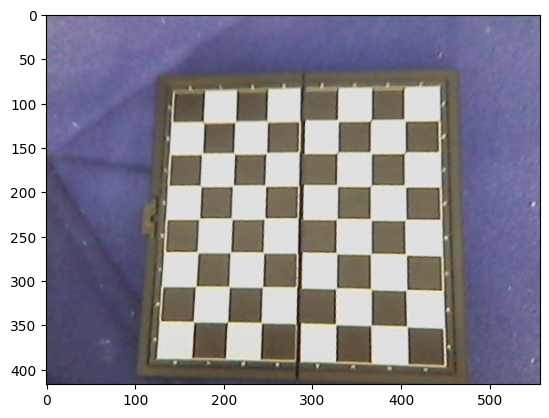

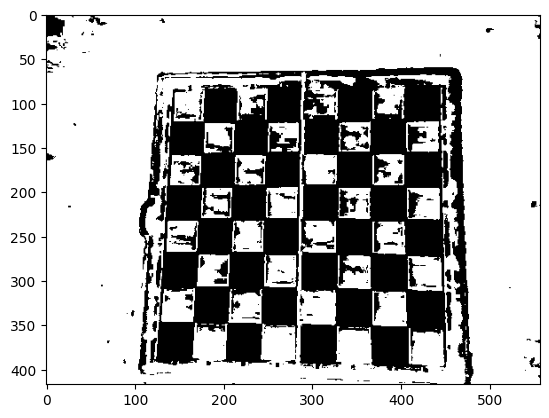

True [[[409.48242 353.2052 ]]

 [[368.12152 349.8743 ]]

 [[325.42508 349.42508]]

 [[285.5     349.5    ]]

 [[243.05962 348.334  ]]

 [[204.89473 347.38446]]

 [[166.06104 346.60458]]

 [[404.13477 312.4434 ]]

 [[366.21313 308.7928 ]]

 [[327.      309.5    ]]

 [[285.      309.     ]]

 [[243.53268 309.05396]]

 [[205.392   306.36655]]

 [[169.57527 306.42468]]

 [[407.65167 273.18402]]

 [[366.5     270.5    ]]

 [[329.5     271.2049 ]]

 [[286.      269.5    ]]

 [[244.38446 267.38803]]

 [[206.28256 270.31897]]

 [[170.5     269.     ]]

 [[403.2436  233.42151]]

 [[367.      232.5    ]]

 [[327.5     231.     ]]

 [[285.12344 231.66321]]

 [[245.45714 232.68034]]

 [[209.5     231.     ]]

 [[174.56538 229.17554]]

 [[406.50876 195.82071]]

 [[365.38535 195.6147 ]]

 [[329.67792 195.58133]]

 [[288.      193.     ]]

 [[247.      193.5    ]]

 [[211.      193.     ]]

 [[176.43684 195.20486]]

 [[404.5     156.5    ]]

 [[364.3939  154.3633 ]]

 [[327.44937 158.5604 ]]

 [[288.

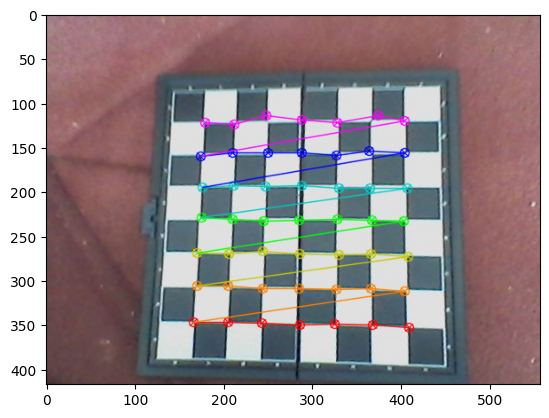

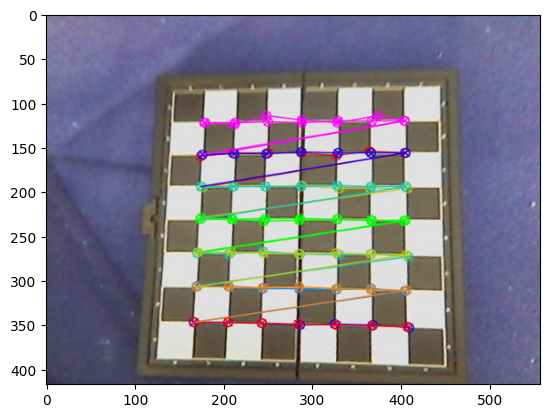

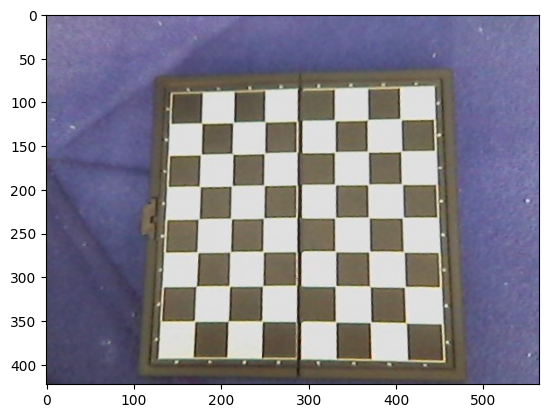

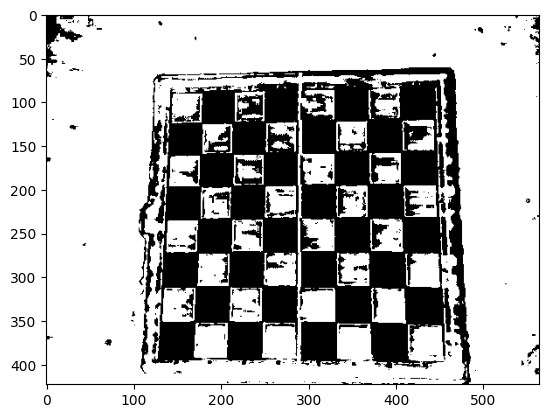

True [[[413.2691   354.36865 ]]

 [[372.57346  351.4105  ]]

 [[333.61154  352.72946 ]]

 [[289.       352.      ]]

 [[248.15573  351.50244 ]]

 [[207.3474   352.52112 ]]

 [[170.       352.      ]]

 [[409.33313  313.55545 ]]

 [[370.51886  311.51886 ]]

 [[331.5      311.5     ]]

 [[289.5      312.      ]]

 [[248.       311.5     ]]

 [[211.18163  311.86398 ]]

 [[171.57404  311.51077 ]]

 [[409.5      272.5     ]]

 [[370.       271.5     ]]

 [[329.38763  270.3852  ]]

 [[290.0057   272.11328 ]]

 [[249.       272.5     ]]

 [[211.       272.      ]]

 [[174.61203  273.61313 ]]

 [[410.41718  230.6364  ]]

 [[369.       232.5     ]]

 [[330.       233.5     ]]

 [[288.24307  233.87726 ]]

 [[247.33047  234.83264 ]]

 [[210.40237  232.3411  ]]

 [[175.       234.5     ]]

 [[405.2178   193.71214 ]]

 [[367.26215  196.41849 ]]

 [[332.0007   196.58122 ]]

 [[290.5      194.5     ]]

 [[251.1242   197.1242  ]]

 [[211.29588  197.3218  ]]

 [[177.46204  197.35086 ]]

 [[406.5      1

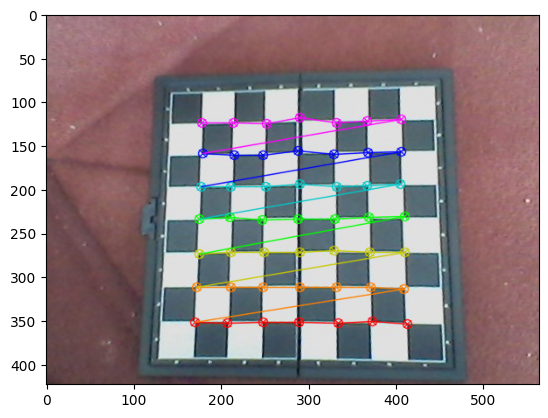

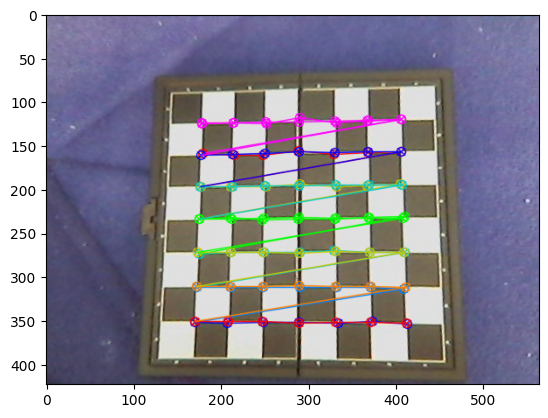

Camera matrix : 

[[1.06992521e+03 0.00000000e+00 2.96384101e+02]
 [0.00000000e+00 9.96769865e+02 1.22470046e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
dist : 

[[-3.31421864e+00  5.89498421e+01  1.33912859e-01  8.24052170e-03
  -4.15190088e+02]]
rvecs : 

(array([[-0.19505447],
       [-0.3444863 ],
       [-3.11204808]]), array([[0.18182418],
       [0.34387372],
       [3.10904672]]))
tvecs : 

(array([[ 2.67498881],
       [ 5.76780055],
       [25.584693  ]]), array([[ 2.78840879],
       [ 5.78198836],
       [25.53042451]]))


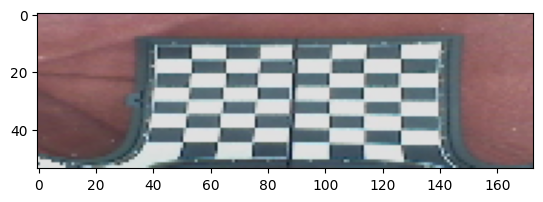

True

In [8]:
#!/usr/bin/env python
 
import cv2
import numpy as np
import os
import glob
import matplotlib.pyplot as plt



# Defining the dimensions of checkerboard
CHECKERBOARD = (7,7)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
 
# Creating vector to store vectors of 3D points for each checkerboard image
objpoints = []
# Creating vector to store vectors of 2D points for each checkerboard image
imgpoints = [] 
 
 
# Defining the world coordinates for 3D points
objp = np.zeros((1, CHECKERBOARD[0] * CHECKERBOARD[1], 3), np.float32)
objp[0,:,:2] = np.mgrid[0:CHECKERBOARD[0], 0:CHECKERBOARD[1]].T.reshape(-1, 2)
prev_img_shape = None
 
# Extracting path of individual image stored in a given directory
images = glob.glob('./fotos/*.jpg')


for fname in images:
    img = cv2.imread(fname)
    plt.imshow(img)
    plt.show()
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    lwr = np.array([0,0,90])
    upr = np.array([179, 61, 252])
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    msk = cv2.inRange(hsv, lwr, upr)
    krn = cv2.getStructuringElement(cv2.MORPH_RECT, (50, 30))
    dlt = cv2.dilate(msk, krn, iterations=5)
    res = 255 - cv2.bitwise_and(dlt, msk)
    res = np.uint8(res)
    res2 = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)
    plt.imshow(res2)
    plt.show()

    ret, corners = cv2.findChessboardCorners(res, (7, 7),
                                            flags=cv2.CALIB_CB_ADAPTIVE_THRESH +
                                                cv2.CALIB_CB_FAST_CHECK +
                                                cv2.CALIB_CB_NORMALIZE_IMAGE + cv2.CALIB_CB_EXHAUSTIVE)
    if ret:
        fnl = cv2.drawChessboardCorners(img, (7, 7), corners, ret)
        img = cv2.cvtColor(fnl, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.show()

    else:
        print("No Checkerboard Found")

    if ret:
        objpoints.append(objp)
        # refining pixel coordinates for given 2d points.
        corners2 = cv2.cornerSubPix(gray, corners, (11,11),(-1,-1), criteria)

        imgpoints.append(corners2)

        # Draw and display the corners
        img_refined = cv2.drawChessboardCorners(img, CHECKERBOARD, corners2, ret)

    img_refined = cv2.cvtColor(img_refined, cv2.COLOR_BGR2RGB)
    plt.imshow(img_refined)
    plt.show()

    h,w = img.shape[:2]
 
"""
Realizando a calibração da camera passando os valores dos pontos 3D conhecidos (objpoints)
e as coordenadas de pixel correspondentes dos cantos detectados (imgpoints)
"""
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
 
print("Camera matrix : \n")
print(mtx)
print("dist : \n")
print(dist)
print("rvecs : \n")
print(rvecs)
print("tvecs : \n")
print(tvecs)

"""
Vamos remover agora a distorção sob outra foto tirada pela mesma camera
"""
img = cv2.imread('./foto_ex.jpg')
h,  w = img.shape[:2]
newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))
dst = cv2.undistort(img, mtx, dist, None, newcameramtx)

# crop the image
x, y, w, h = roi
dst = dst[y:y+h, x:x+w]
img_final = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
plt.imshow(img_final)
plt.show()
cv2.imwrite('calibresult.png', img_final)
